# Exploratory Data Analysis - Clinical Dataset

**Author:** [Your Name]  
**Date:** October 27, 2025  
**Purpose:** Initial exploration of clinical data for ML-based diagnosis

## Objective

This notebook performs exploratory data analysis (EDA) on clinical data to:
1. Understand data structure and quality
2. Identify missing values and outliers
3. Visualize distributions and relationships
4. Generate insights for feature engineering


## 1. Setup and Import Libraries


In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")


Libraries imported successfully!
NumPy version: 1.26.4
Pandas version: 2.2.2


## 2. Load Data

Load the clinical dataset and perform initial inspection.


In [ ]:
# Generate synthetic clinical data for demonstration
# In practice, load from: df = pd.read_csv('../data/raw/clinical_data.csv')

np.random.seed(42)
n_samples = 1000

# Generate synthetic data
data = {
    'patient_id': [f'PT{str(i).zfill(4)}' for i in range(1, n_samples + 1)],
    'age': np.random.randint(18, 85, n_samples),
    'gender': np.random.choice(['M', 'F'], n_samples),
    'bmi': np.random.normal(27, 5, n_samples),
    'blood_pressure_sys': np.random.normal(130, 20, n_samples),
    'blood_pressure_dia': np.random.normal(85, 12, n_samples),
    'glucose': np.random.normal(100, 25, n_samples),
    'cholesterol': np.random.normal(200, 40, n_samples),
    'heart_rate': np.random.normal(75, 10, n_samples),
    'biomarker_a': np.random.gamma(2, 2, n_samples),
    'biomarker_b': np.random.exponential(1.5, n_samples),
    'diagnosis': np.random.choice([0, 1], n_samples, p=[0.7, 0.3])
}

df = pd.DataFrame(data)

# Introduce some missing values
missing_indices = np.random.choice(df.index, size=50, replace=False)
df.loc[missing_indices, 'biomarker_a'] = np.nan

print(f"Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


Data loaded successfully!
Shape: (1000, 12)

First few rows:


,patient_id,age,gender,bmi,blood_pressure_sys,blood_pressure_dia,glucose,cholesterol,heart_rate,biomarker_a,biomarker_b,diagnosis
0,PT0001,69,M,32.540914,106.211762,76.244770,98.434011,216.009434,66.046456,5.250199,0.071735,0
1,PT0002,32,F,21.800470,162.853459,89.337008,106.078086,208.066116,85.628537,2.429307,4.355785,0
2,PT0003,78,F,30.063870,111.987585,69.482301,92.643937,158.801109,98.378277,0.195789,0.564738,1
3,PT0004,38,F,21.732922,142.767839,91.868684,133.914585,201.843169,66.392432,4.332741,0.876679,1
4,PT0005,41,M,23.881155,123.427630,90.407241,94.991186,157.052454,80.342079,8.007653,0.182641,0


## 3. Data Overview and Statistical Summary

Examine the structure, data types, and descriptive statistics of the dataset.


In [ ]:
# Basic information
print("=" * 50)
print("DATASET INFORMATION")
print("=" * 50)
df.info()

print("\n" + "=" * 50)
print("STATISTICAL SUMMARY")
print("=" * 50)
df.describe()

print("\n" + "=" * 50)
print("MISSING VALUES ANALYSIS")
print("=" * 50)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values(
    'Missing Count', ascending=False
)

if len(missing_data) > 0:
    print(missing_data)
else:
    print("No missing values found!")


DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          1000 non-null   object 
 1   age                 1000 non-null   int32  
 2   gender              1000 non-null   object 
 3   bmi                 1000 non-null   float64
 4   blood_pressure_sys  1000 non-null   float64
 5   blood_pressure_dia  1000 non-null   float64
 6   glucose             1000 non-null   float64
 7   cholesterol         1000 non-null   float64
 8   heart_rate          1000 non-null   float64
 9   biomarker_a         950 non-null    float64
 10  biomarker_b         1000 non-null   float64
 11  diagnosis           1000 non-null   int32  
dtypes: float64(8), int32(2), object(2)
memory usage: 86.1+ KB

STATISTICAL SUMMARY

MISSING VALUES ANALYSIS
                  Column  Missing Count  Missing Percentage
biomarker_a  biomar

## 4. Visualization: Distribution of Target Variable


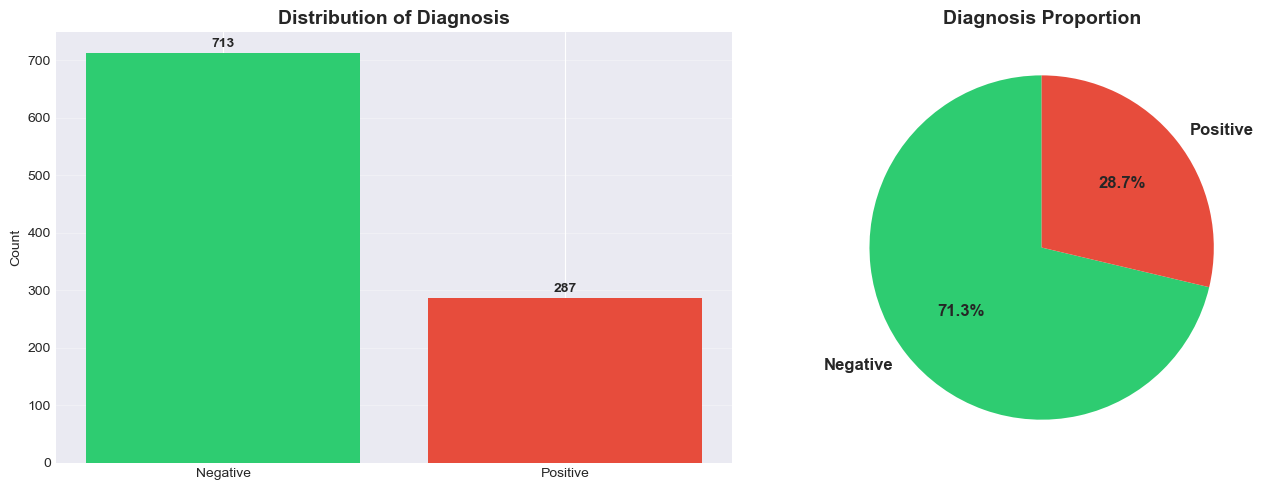

Class imbalance ratio: 2.48:1


In [ ]:
# Distribution of target variable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
diagnosis_counts = df['diagnosis'].value_counts()
axes[0].bar(['Negative', 'Positive'], diagnosis_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Diagnosis', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add counts on bars
for i, v in enumerate(diagnosis_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(diagnosis_counts.values, labels=['Negative', 'Positive'], 
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'],
            startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Diagnosis Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Class imbalance ratio: {diagnosis_counts[0]/diagnosis_counts[1]:.2f}:1")
